# CSMODEL Case Study - Phase 1

### Members:
- Angelo Guerra
- Adrian Yung Cheng
- Alina Sayo
- Mark Daniel Gutierrez

**Section**: S15

**Instructor**: Mr. Gabriel Avelino Sampedro

In this notebook, we will be using the **[Spotify Top Hits from 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** Dataset. The notebook will cover an analysis of the raw dataset and various processes to extract meaningful insights and conclusions from the data.


## Importing Libraries

First, import the necessary libraries to perform data operation throughout this notebook:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

* **Numpy** - Numpy is a software library for Python designed for working with arrays and encompassing functions related to linear algebra, fourier transforms, and matrices.
* **Pandas** - Pandas is a software library for Python designed for data manipulation and data analysis.
*  **Matplotlib** - Matplotlib is a software library for data visualization for Python, allowing us to easily render various types of graphs.
* **Seaborn** - Seaborn is a software library for data visualization for Python designed to create attractive and informative statistical graphics, making it easier to make complex visualizations compared to using Matplotlib alone.

## Dataset Description

### Brief Description

The dataset used throughout this notebook consists of a `.csv` file containing audio statistics of the top 2000 tracks from 2000-2019 on Spotify, a global audio streaming service. The data contains information about each track and its qualities, including the song artist, year it was released, popularity rate, and various characteristics. The dataset takes advantage of Spotify's huge collection of music to create a useful resource which could help those who want to statistically assess and analyze the platform's top hits from the past two decades.

### Collection Process

The dataset **[Top Hits Spotify 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** was collected from a popular digital music streaming service called Spotify and was posted on Kaggle by user Mark Koverha. This dataset draws from Spotify’s extensive music catalog to create a comprehensive resource. Spotify has created multiple playlists for the top hits of each year. The data was then extracted from these playlists and Koverha collected it using the `Spotipy` library for Python.

Currently, Spotify provides a publicly available API. The Spotify Web API and the `Spotipy` Python library were utilized to gather track informaton to compile the dataset.

### Dataset File Structure

Each entry (row) in the dataset is a top hit song released during the year 2000 until 2019. On the other hand, each column represents a single component (variable) of the track that would differentiate it from other entries, such as its artist, title, and many other aspects, with ten (18) specific variables to account for. There are a total of **2000 entries** and **18 variables** in the dataset.

The `read_csv()` function of the pandas library, in this case, is used to assign the dataset to a properly-usable variable in Python. The `info()` function, on the other hand, is used to display the general information about the dataset itself.

Now, let us load the data from the `songs_normalize.csv` file using the `read_csv` function and assign the resulting dataframe to the variable `spotify_df`. Then, we can use the `info` function to display a quick summary of how the data is structured.

In [2]:
spotify_df = pd.read_csv('songs_normalize.csv')
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


The `shape` function determines the size of the dataset by getting the number of entries (rows) and variable (columns).

In [3]:
spotify_df.shape

(2000, 18)

Based on the code execution above, there are indeed **2000** entries and **18** variables.

We can then use the `describe()` function to provide a statistical description of the dataset and its variables containing numerical data, which includes the mean, count, standard deviation, and many more.

In [4]:
spotify_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


By calling the `head()` function of the pandas library, the program will now display the first 5 (default value) rows/entries of the dataset. 

In [5]:
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


To display the last 5 (default value) rows of the dataset, the `tail()` function will be used.

In [6]:
spotify_df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


### Variables

Each variable included in the dataset is a generalized form of specifying the different entries of the dataset in a substantial manner. The following are the variables used:

| Variable         | Description | Datatype |
|------------------|-------------|----------|
| Artist           | The track’s singer and writer.        | Object  |
| Title            | The track’s title.                    | Object  |
| Duration_ms      | The track’s duration is milliseconds. | Integer |
| Explicit         | Dictates whether or not the track contains explicit content or not. | Boolean     |
| Year             | The track’s release year.             | Integer |
| Popularity       | A measure that visualizes the popularity of the song. Ranges from 0 (least popular) to 100 (most popular). | Integer |
| Danceability     | A measure that represents the measure of a song’s beat strength, stability, and tempo. Ranges from 0 (least danceable) to 1 (most danceable). | Float |
| Energy           | A measure of the track’s intensity and activity. Ranges from 0 (least energy) to 1 (most energy). | Float |
| Key              | The music key of the track, represented as integers using standard Pitch Class notation. | Integer |
| Loudness         | A measure of the overall loudness of the track in decibels (dB), averaged across the entire track. | Float |
| Mode             | Indicates whether the track is in a major (1) or minor (0) key. | Integer |
| Speechiness      | Measures the presence of spoken words in the track, with values closer to 1.0 indicating more speech content. While values closer to 0.0 most likely represent music and other non-speech-like tracks. | Float |
| Acousticness     | A confidence measure of whether the track is acoustic, with 1.0 representing high confidence that the track is acoustic. | Float |
| Instrumentalness | Predicts whether the track contains vocals, with values closer to 1.0 indicating a higher likelihood of no vocal content. | Float |
| Liveness         | Detects the presence of an audience in the recording, with higher values suggesting a live performance. | Float |
| Valence          | A measure describing the music positiveness of the track, ranging from 0.0 (negative) to 1.0 (positive). Where tracks with high valence sound more positive and tracks with low valence sound more negative. | Float |
| Tempo            | The estimated tempo of the track in beats per minute (BPM). | Float |
| Genre            | The genre of the track.                | Object |

## Data Cleaning

### Removing Unused Variables

// place shit here TODO

// drop function

In [7]:
spotify_df = spotify_df.drop(['explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'genre'], axis = 1)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   energy            2000 non-null   float64
 6   instrumentalness  2000 non-null   float64
 7   tempo             2000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 125.1+ KB


### Check for Multiple Representations

To check whether or not the dataset contains multiple representations of values per variable, we can call the `unique()` function of the pandas library.

In [8]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'G

According to the results displayed by the function, all unique values within each of the variables of the dataset fit its valid parameters. 

### Check for Incorrect Datatypes

// place shit here TODO

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   energy            2000 non-null   float64
 6   instrumentalness  2000 non-null   float64
 7   tempo             2000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 125.1+ KB


Based on the datatypes displayed by the dataset, all of the variables have the proper corresponding datatype assigned to them.

### Check for Default Values

// place shit here TODO

In [10]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'G

According to the results provided by the function, only the year variable contained data that did not fit its parameters (years from 2000 to 2019 only).

In [11]:
spotify_df = spotify_df[(spotify_df['year'] >= 2000) & (spotify_df['year'] <= 2019)]
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1958 non-null   object 
 1   song              1958 non-null   object 
 2   duration_ms       1958 non-null   int64  
 3   year              1958 non-null   int64  
 4   popularity        1958 non-null   int64  
 5   energy            1958 non-null   float64
 6   instrumentalness  1958 non-null   float64
 7   tempo             1958 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 137.7+ KB


In [12]:
spotify_df.shape

(1958, 8)

After dropping the invalid records, calling the shape of the newly-updated dataset displayed only `1958 remaining entries`. This meant that out of the initial 2000 entries of the dataset, there were `42 invalid entries` removed.

### Check for Missing Data

To check for missing data within the dataset, we can use the `isnull()` function if there exists null values per variable.

In [13]:
spotify_df.isnull().any()

artist              False
song                False
duration_ms         False
year                False
popularity          False
energy              False
instrumentalness    False
tempo               False
dtype: bool

Based on the results provided by the function, all of the variables does not contain any null values.

### Check for Duplicate Data

To check for duplicated data within the dataset, we can use the `duplicated()` function to identify whether or not there are duplicate records.

In [14]:
spotify_df.duplicated().any()

True

Based on the provided result of the function, we can classify the dataset to contain duplicate records. We can use the `drop_duplicates` function to remove these records.

In [15]:
spotify_df = spotify_df.drop_duplicates()

In [16]:
spotify_df.shape

(1899, 8)

The new dataset that does not contain duplicate records now contain `1899 unique records`. This meant that there were `59 duplicate records` present in the initial dataset.

### Checking for Inconsistent Formatting

// place shit here TODO

In [17]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'Bon Jovi' '*NSYNC' 'Eminem' 'Robbie Williams' 'Modjo'
 "Gigi D'Agostino" "Bomfunk MC's" 'Aaliyah' 'Alice Deejay' 'Linkin Park'
 'Sonique' 'M.O.P.' 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Kylie Minogue' 'LeAnn Rimes'
 'Avant' 'Toni Braxton' 'Bow Wow' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'JAY-Z' 'Baha Men'
 'Oasis' 'DJ Ötzi' 'P!nk' 'Mariah Carey' 'Craig David' 'Sammie' 'Kandi'
 'Vengaboys' 'Ronan Keating' '3 Doors Down' 'Carl Thomas' 'Mystikal'
 'Fuel' 'Westlife' 'All Saints' "Destiny's Child" 'Erykah Badu'
 'Matchbox Twenty' 'Gabrielle' 'Backstreet Boys' 'The Corrs' 'Joe' 'Nelly'
 'Shaggy' 'Christina Aguilera' 'Nelly Furtado' 'Shakira' 'Jimmy Eat World'
 'Train' 'Geri Halliwell' 'Blu Cantrell' 'Missy Elliott' 'Mary J. Blige'
 'Faithless' 'Lasgo' 'iio' 'Emma Bunton' '112' 'Blue' 'Jessica Simpson'
 'Michael Jackson' 'Eve' 'Jennifer Lo

Upon checking the results, the dataset seems to not contain any inconsistencies in its formatting.

## Exploratory Data Analysis

1. What is the distribution of songs according to release year?

2. What is the distribution of songs according to duration?

3. What is the distribution of the songs according to their level of instrumentalness?

4. What is the distribution of the songs according to their level of tempo?

5. What is the relationships between duration, instrumentalness, and tempo with the release year?

### Question 1: What is the distribution of top hits according to release year?

// What variables will be used?



#### Numerical Summaries

// write me

In [18]:
songs_per_year = spotify_df.year.value_counts().reset_index(name='songs')
songs_per_year


,year,songs
0,2012,113
1,2017,110
2,2001,106
3,2018,104
4,2010,103
5,2005,101
6,2014,100
7,2016,98
8,2011,96
9,2004,95


#### Data Visualization

*Bar Plot*

// write me

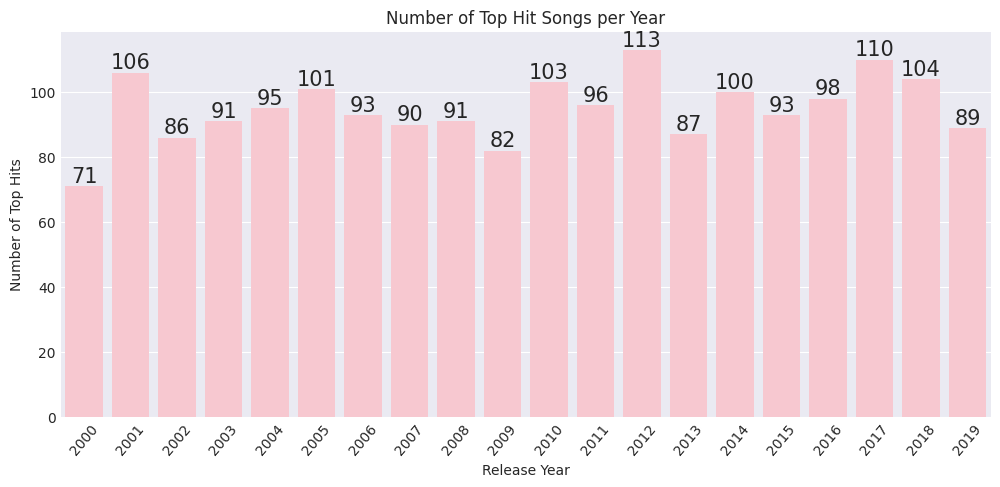

In [19]:
# bar plot of the number of songs per year
plt.figure(figsize=(12, 5))
ax = sb.barplot(x = 'year', y ='songs', data = songs_per_year, color='pink')

# add labels
plt.title('Number of Top Hit Songs per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Top Hits')
plt.xticks(rotation = 50)

# label on top of each bar
for container in ax.containers:
    ax.bar_label(container, size=15)

plt.show()


// post interpretation

### Question 2: What is the average duration of top hits per year and 

// write me

#### Numerical Summaries

// mean of duration per year

In [20]:
# convert ms to min:sec
def ms_to_min_sec(ms):
    minutes = int(ms / 60000)
    seconds = int((ms % 60000) / 1000)
    return str(minutes) + ":" + str(seconds)

# Organizing a dataframe with the average duration of the top hits from the analyzed period
average_duration = spotify_df[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] = average_duration['duration_ms'].apply(ms_to_min_sec)
average_duration[['year','min:sec']]

,year,min:sec
0,2000,4:10
1,2001,4:2
2,2002,4:11
3,2003,3:56
4,2004,3:53
5,2005,3:57
6,2006,3:58
7,2007,3:52
8,2008,3:54
9,2009,3:55


// post interpretation

#### Data Visualization

*Scatterplot*

write me

Text(-1.4843750000000053, 0.5, 'Duration (ms)')

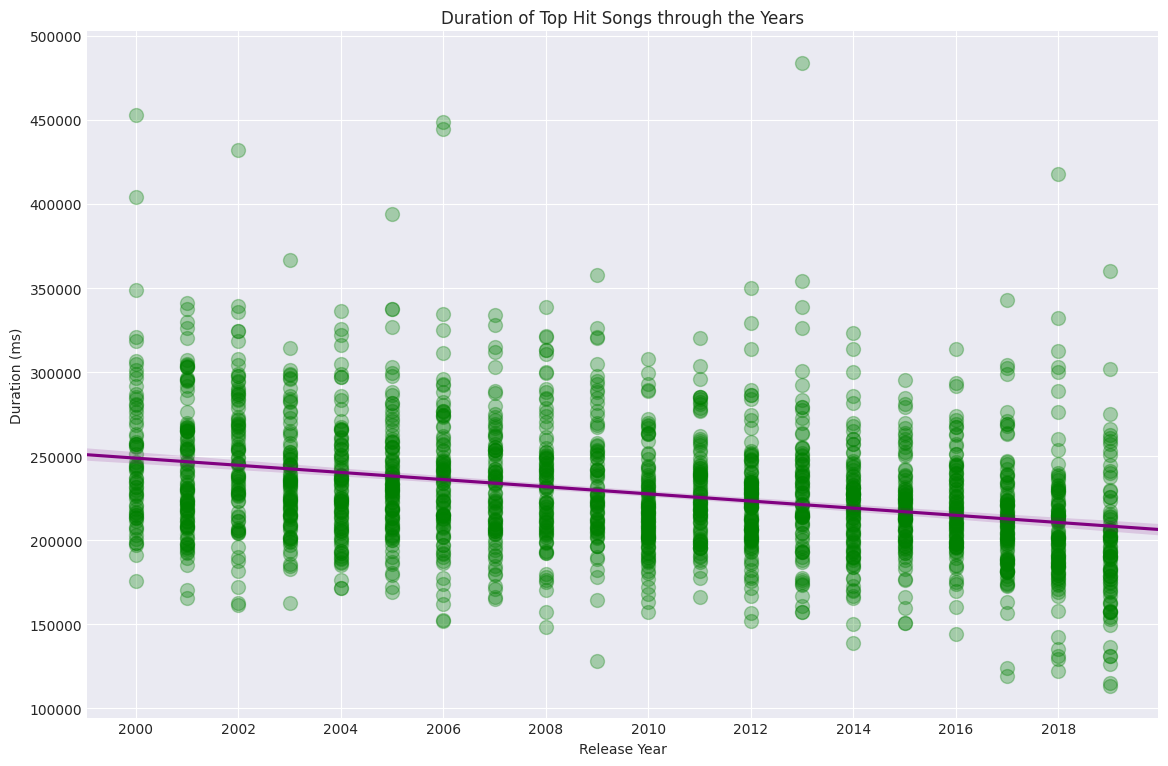

In [21]:
# generate scatter plot with trendline
scatter = sb.lmplot(x = 'year', y = 'duration_ms', data = spotify_df, height = 5, aspect = 2, truncate = False, scatter_kws = {'s': 100, 'alpha': 0.3, 'color': 'green'}, line_kws = {'color': 'purple'})

# adjust size
scatter.figure.set_size_inches(12, 8)

# add labels
plt.title('Duration of Top Hit Songs through the Years')
plt.xlabel('Release Year')
plt.xticks(np.arange(2000, 2020, 2))
plt.ylabel('Duration (ms)')


// post interpretation

### Question 3: What is the distribution of the songs according to their level of instrumentalness?

// write me

#### Numerical Summaries

// mean median std

In [22]:
# get the mean median and std
spotify_df.agg({'instrumentalness': ['mean', 'median', 'std']})


,instrumentalness
mean,0.015525
median,0.000000
std,0.089036


post interpretation

#### Data Visualization

*Histogram*

write me

Text(0, 0.5, 'Number of Top Hits')

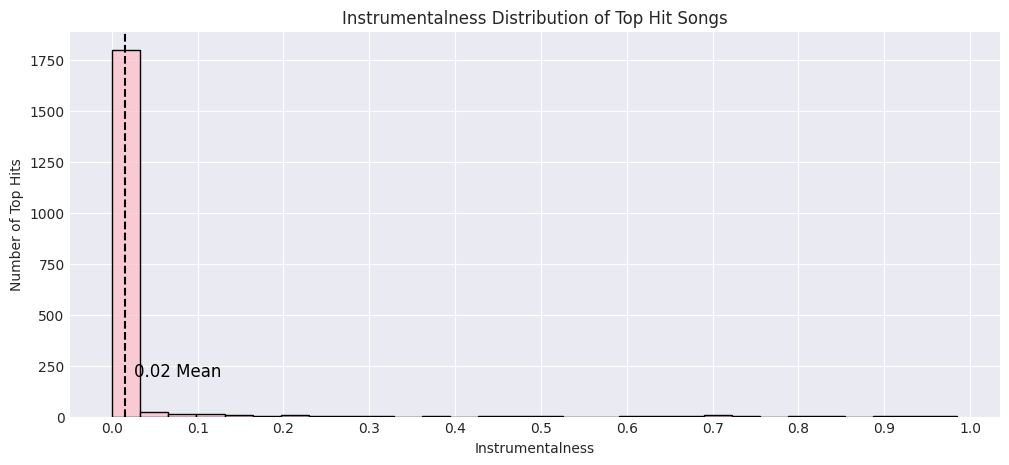

In [23]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'instrumentalness', bins = 30, color = 'pink')

# add vertical line
plt.axvline(x = np.mean(spotify_df.instrumentalness), color = 'black', linestyle = '--')
plt.text(x = np.mean(spotify_df.instrumentalness) + 0.01, y = 200, s = '0.02 Mean', color = 'black', fontsize = 12)

# add labels
plt.title('Instrumentalness Distribution of Top Hit Songs')
plt.xlabel('Instrumentalness')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Number of Top Hits')


### Question 4: What is the distribution of the songs according to their level of tempo?

#### Numerical Summaries

// write me

In [24]:
# get the mean median and std
spotify_df.agg({'tempo': ['mean', 'median', 'std']})


,tempo
mean,120.115425
median,120.028000
std,26.986107


#### Data Visualization

*Histogram*

// write me

Text(0, 0.5, 'Number of Top Hits')

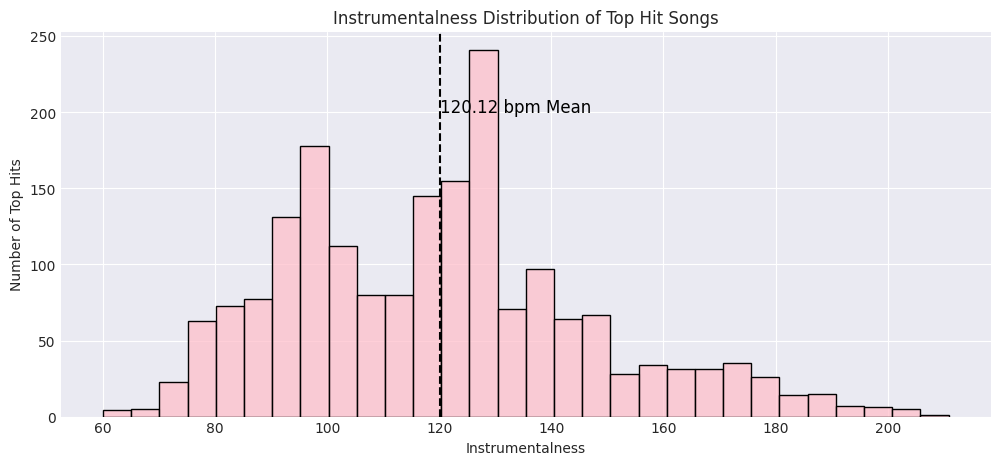

In [25]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'tempo', bins = 30, color = 'pink')

# add vertical line
plt.axvline(x = np.mean(spotify_df.tempo), color = 'black', linestyle = '--')
plt.text(x = np.mean(spotify_df.tempo) + 0.01, y = 200, s = '120.12 bpm Mean', color = 'black', fontsize = 12)

# add labels
plt.title('Instrumentalness Distribution of Top Hit Songs')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Top Hits')


post interpretation

### Question 5: What is the relationships between instrumentalness and tempo with the release year?

#### Numerical Summaries

In [26]:
instru_tempo_year = spotify_df[['instrumentalness', 'tempo', 'year']]
corr = instru_tempo_year.corr()
corr

,instrumentalness,tempo,year
instrumentalness,1.000000,0.035449,-0.055978
tempo,0.035449,1.000000,0.082748
year,-0.055978,0.082748,1.000000


#### Data Visualization

<Axes: >

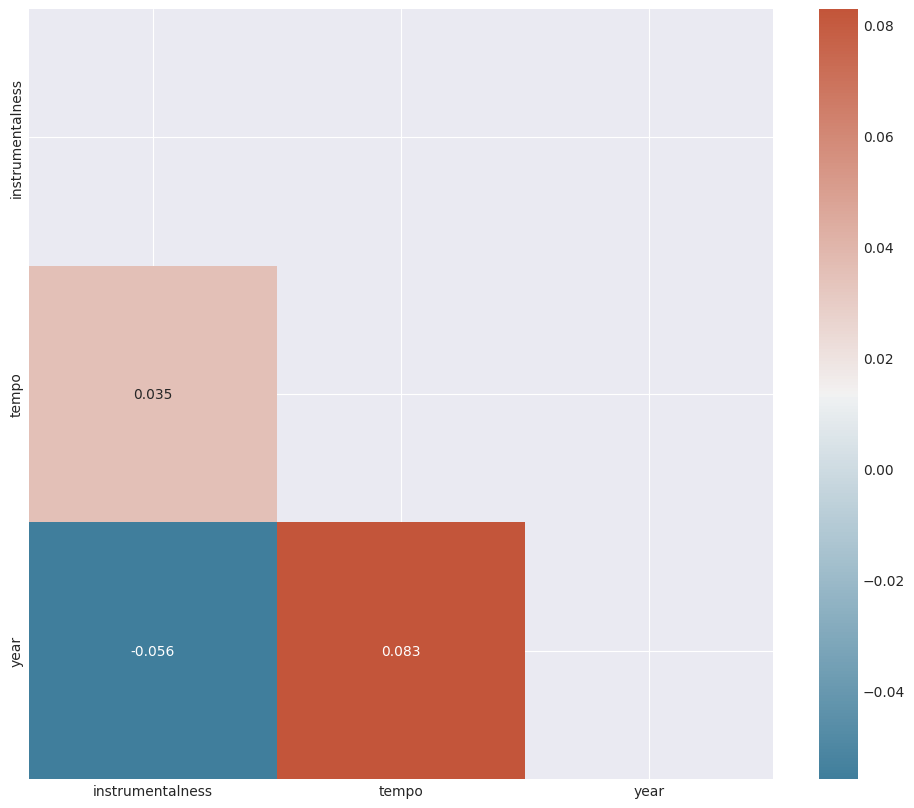

In [27]:
# Heatmap Design
f, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr, annot=True, cmap=cmap, mask=mask)

## Research Question

---
### Can we cluster and determine when a song is/was released depending on the following variables: (1) duration, (2) instrumentalness, and (3) tempo?
---

### Rationale for Research Question based on EDA

### Significance of Research Question